# CSS Bootcamp

## Day 3 (Linear regression): Lab

This lab is intended to accompany **Day 3** of the week on **Statistics**, which focuses on:

- The concept of a **statistical model**.  
- The theoretical foundations of **linear regression**.  
- Building and interpreting linear models using `statsmodels`.  

This lab has some "free response" questions, in which you are asked to describe or make some inference from a graph. 

It also has questions requiring you to program answers in Python. In some cases, this will use built-in functions we've discussed in class (either today, or previous weeks). In others, there'll be a built-in function that we *haven't* discussed, which you will have to look up in the documentation. And in other cases, you'll be asked to write an original function.

Please reach out for help if anything is unclear!

#### Key imports

Here, we import some of the libraries that will be critical for the lab.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Part 1: Foundations

This part of the lab will help you build your *conceptual knowledge* of linear regression (and statistical modeling more generally).

### 1a. Linear equation.

##### In the linear equation below, which term corresponds to the intercept, and which to the slope? 

$\Large Y = 2X + 5$

In [2]:
#### Your response here

##### Using the linear equation below, what would be your prediction when $X = 10$?

$\Large Y = 2X + 5$

In [3]:
#### Your response here

### 1b. Explanatory power

##### Consider the dataset below. Does there appear to be a linear relationship between $X$ and $Y$?

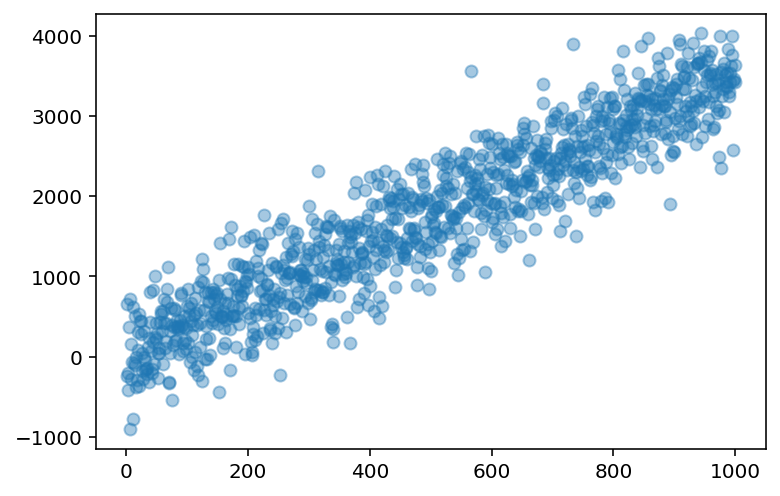

In [4]:
np.random.seed(1)
X = np.arange(1, 1001)
Y = X * 3.5 + np.random.normal(loc = 0, scale = 400, size = 1000)
plt.scatter(X, Y, alpha = .4)

In [5]:
#### Your response here

##### What is the mean of $Y$?

In [6]:
#### Your response here

In [7]:
Y.mean()

1767.2749904638408

##### Now consider an "intercept-only" model––i.e., predicting $Y$ with only the mean. Using the same graph as before, plot these "predictions" on top of the graph.

(Note: this should look like a solid line on top of the graph. You can use `plt.axhline` to do this.)

In [8]:
#### Your response here

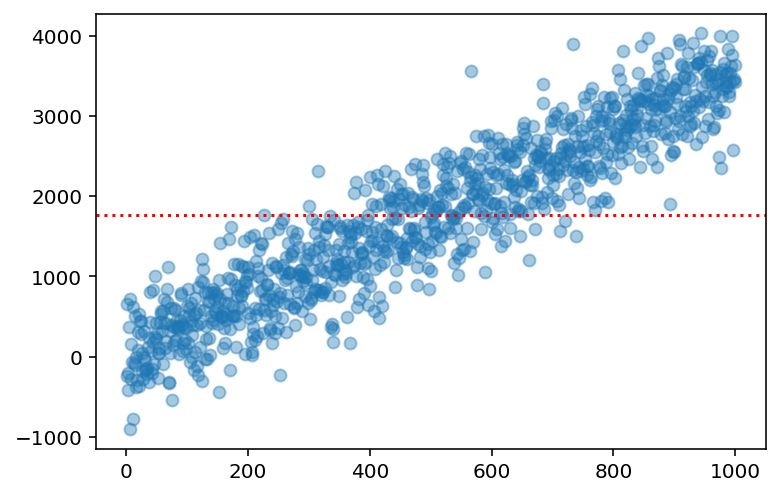

In [9]:
plt.scatter(X, Y, alpha = .4)
plt.axhline(Y.mean(), linestyle = "dotted", color = "red")

##### What is the standard error of the estimate for this simple intercept-only model?

Recall that the formula is:

 $\Large S_{Y|X} = \sqrt{\frac{RSS}{n-2}}$

In [10]:
#### Your response here

In [11]:
see_y1 = math.sqrt(sum((Y.mean() - Y)**2)/(len(Y)-2))
see_y1

1078.3807540575574

##### Now, suppose we add a slope to our model instead of just using $\bar{Y}$. To find the optimal slope, conduct a grid search over the following parameters: $[2, 2.5, 3, 3.5, 4]$.

To answer this question, implement the following steps:

- First, iterate through each parameter using a `for` loop: `[2, 2.5, 3, 3.5, 4]`
- Next, generate **predictions** $\hat{Y}$ by plugging that parameter, $\beta$, into an equation: $\hat{Y} = \beta X$
- Calculate the standard error of the estimate for each set of predictions.  
- Plot the standard error of the estimate values for each parameter value to determine which is best (lowest).

**Note**: This problem is a little more complex––please reach out if you have questions! (Note that the part of the lecture on standard error of the estimate also contains an example similar to this.)

In [12]:
#### Your response here

<AxesSubplot:xlabel='beta', ylabel='see'>

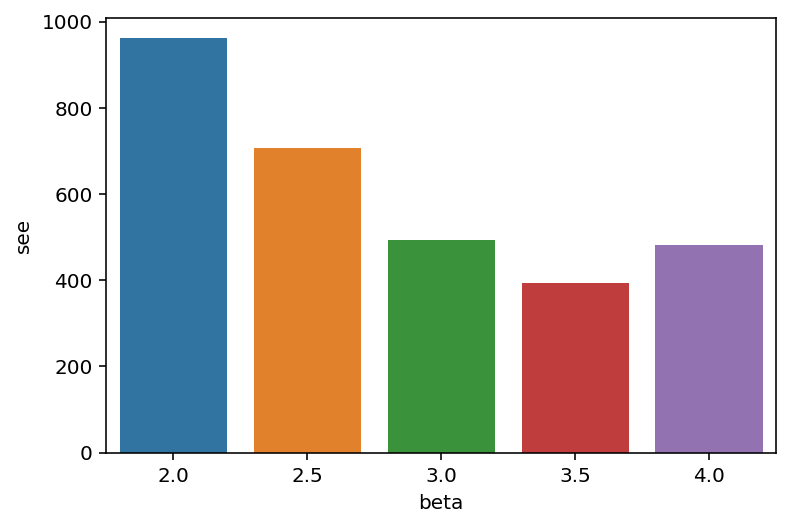

In [13]:
results = []
for beta in [2, 2.5, 3, 3.5, 4]:
    y_pred = X * beta
    see = math.sqrt(sum((y_pred - Y)**2)/(len(Y)-2))
    results.append({
        'beta': beta,
        'see': see
    })
df_results = pd.DataFrame(results)
sns.barplot(data = df_results,
           x = 'beta',
           y = 'see')

### Summary

Hopefully, $S_{Y|X} = \sqrt{\frac{RSS}{n-2}}$ should look smaller for the predictions using that optimized **Slope** parameter, than in our model using only the mean of $Y$, i.e., $\bar{Y}$.

Conceptually, this makes sense: we make better **predictions** when we have more **information** about $Y$––and that more complex model added more *parameters*, which carried at least some information about $Y$.

### 1c. Residual variance.

##### Consider the two plots below. Based on visual inspection alone, does one plot exhibit more heteroscedasticity than the other?

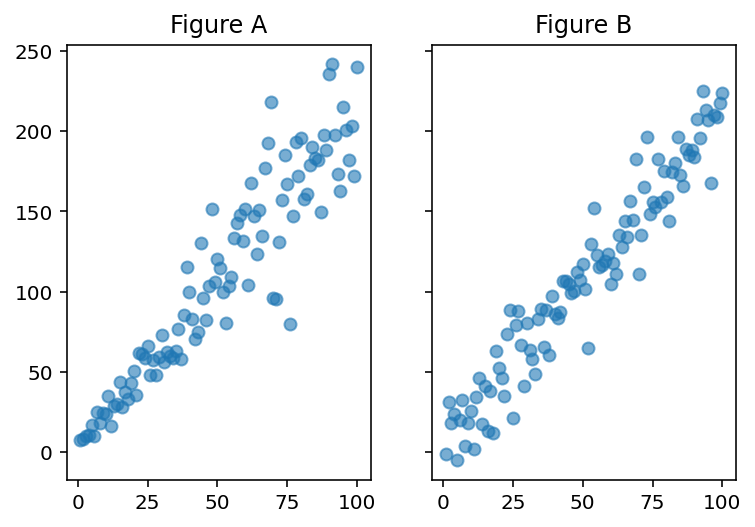

In [14]:
np.random.seed(1)
X = np.arange(1, 101)
y1 = 5 + X *2 + np.random.normal(loc = 0, scale = X/2,
                         size = 100)
y2 = 5 + X *2 + np.random.normal(loc = 0, scale = 18, size = 100)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X, y1, alpha = .6)
ax1.title.set_text("Figure A")
ax2.scatter(X, y2, alpha = .6)
ax2.title.set_text("Figure B")

In [15]:
#### Your response here

##### Now generate a set of predictions from `X` using the linear equation with the following parameters:

$\Large Y = 2X + 5$

In [16]:
#### Your response here

In [17]:
y_pred = X * 2 + 5

##### Plot these predictions over each of the subplots from above, i.e., over `y1` and `y2` from Figure 1 and Figure 2.

In [18]:
#### Your response here

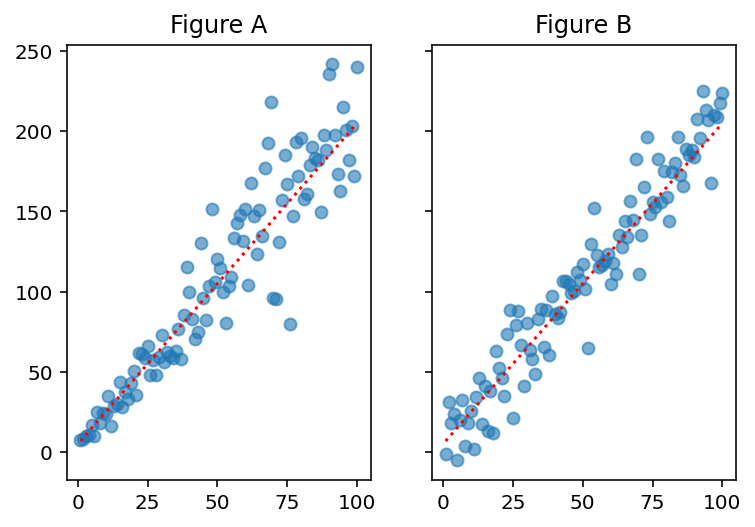

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X, y1, alpha = .6)
ax1.title.set_text("Figure A")
ax2.scatter(X, y2, alpha = .6)
ax2.title.set_text("Figure B")
ax1.plot(X, y_pred, linestyle = "dotted", color = "red")
ax2.plot(X, y_pred, linestyle = "dotted", color = "red")

##### For each of these datasets, calculate the standard error of the estimate.

In [20]:
#### Your response here

In [21]:
see_y1 = math.sqrt(sum((y_pred - y1)**2)/(len(y1)-2))
see_y2 = math.sqrt(sum((y_pred - y2)**2)/(len(y2)-2))
print("Standard error of the estimate for Y1: {x}".format(x = see_y1))
print("Standard error of the estimate for Y2: {x}".format(x = see_y2))

Standard error of the estimate for Y1: 22.80172286443121
Standard error of the estimate for Y2: 17.172451513422693


##### Is $S_{Y|X}$ more appropriate for one of these datasets than the other? Why or why not?

In [22]:
#### Your response here

##### For each dataset, calculate the squared deviation for each datapoint from the predicted value.

Note that this is equivalent to calculating $RSS$ *before* summing up those squared deviations:

$(\hat{Y} - Y)^2$

In [23]:
#### Your response here

In [24]:
sq_y1 = (y_pred - y1)**2
sq_y2 = (y_pred - y2)**2

##### Plot each of these squared deviations against $X$, in subplots as above.

In [25]:
#### Your response here

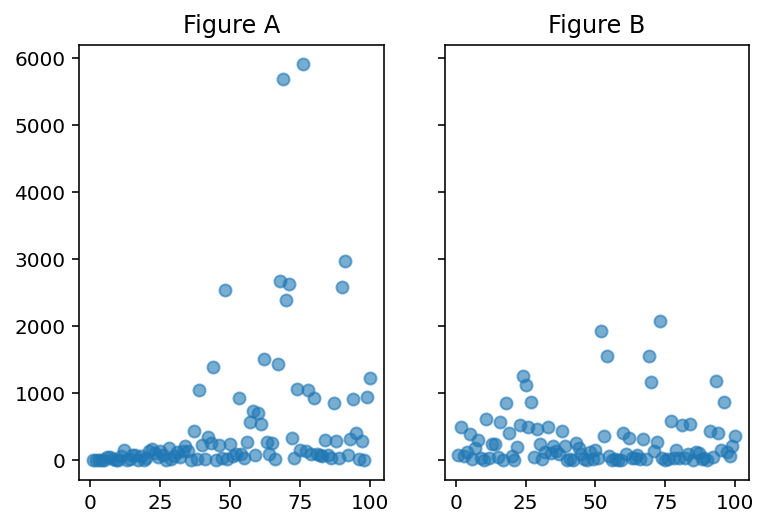

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(X, sq_y1, alpha = .6)
ax1.title.set_text("Figure A")
ax2.scatter(X, sq_y2, alpha = .6)
ax2.title.set_text("Figure B")

##### Does one of these figures exhibit more signs of heteroscedasticity? Which one? Does that match your conclusion from earlier?

In [27]:
#### Your response here

## Part 2: Modeling

In this part of the lab, you'll actually build **linear regression models** in Python. Then you'll use these models to make predictions, measure residuals, and interpret relationships.

### 2a. Predicting word relatedness

In this section, we'll predict human judgments of how **related** two uses of the same word are, in different contexts.

For example:

- "Marinated **lamb**" vs. "Friendly **lamb**".  
- "Baseball **bat**" vs. "Fruit **bat**".  

The original dataset comes from [Trott & Bergen (2021)](https://arxiv.org/abs/2105.13266), and can be found on [GitHub](https://github.com/seantrott/raw-c). 

- Our main goal here is to ask how well different **variables**  predict measures of relatedness.
- Note: The "cosine distance" measure you'll be using measures how **distance** two points are in vector-space––a larger value means that the points are **more distant**.  

##### Load data

First, let's load a version of the dataset, which can be found in `data/lab/raw-c.csv`.

These are the variables we're most interested in for now: 

- `mean_relatedness`: this is what we want to predict.  
- `distance_bert`: this is a measure of the **cosine distance** between contextualized representations of the target word (e.g., "lamb"), using a language model called BERT. (More on this in Week 8!)
- `distance_elmo`: this is a measure of the **cosine distance** between contextualized representations of the target word (e.g., "lamb"), using a language model called eLMO.  (More on this in Week 8!)
- `same`: this is a **binary** variable telling us whether the two uses belong to the *same meaning* or not. 

In [28]:
df_rawc = pd.read_csv("data/lab/raw-c.csv")
df_rawc.head(5)

,word,sentence1,sentence2,same,ambiguity_type,mean_relatedness,distance_bert,distance_elmo
0,act,It was a desperate act.,It was a magic act.,False,Polysemy,2.181818,0.204110,0.034093
1,act,It was a desperate act.,It was a comedic act.,False,Polysemy,2.000000,0.215616,0.045927
2,act,It was a humane act.,It was a magic act.,False,Polysemy,2.818182,0.191488,0.042351
3,act,It was a humane act.,It was a comedic act.,False,Polysemy,2.809524,0.225272,0.057707
4,act,It was a desperate act.,It was a humane act.,True,Polysemy,3.900000,0.167990,0.041440


##### First, create a histogram of `distance_bert`. How would you describe this distribution. Is it normal? Skewed?

In [29]:
#### Your code here.

<AxesSubplot:xlabel='distance_bert', ylabel='Count'>

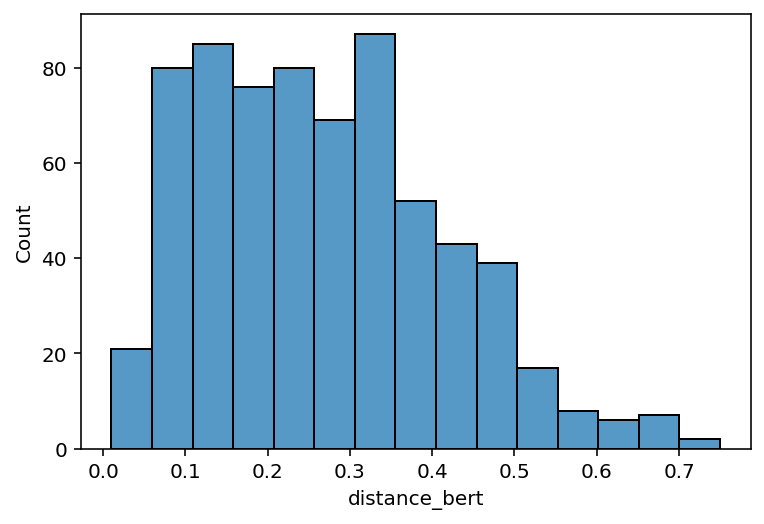

In [30]:
sns.histplot(data = df_rawc, x = 'distance_bert')

##### Now, create a histogram of `distance_elmo`. How would you describe this distribution. Is it normal? Skewed?

In [31]:
#### Your code here.

<AxesSubplot:xlabel='distance_elmo', ylabel='Count'>

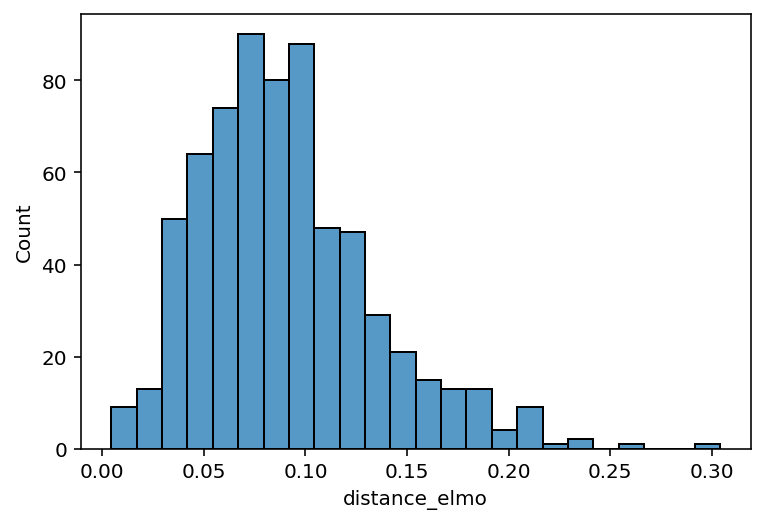

In [32]:
sns.histplot(data = df_rawc, x = 'distance_elmo')

##### Now, create a scatterplot showing `mean_relatedness ~ distance_bert`.  

In [33]:
#### Your code here.

Text(0, 0.5, 'Mean Relatedness')

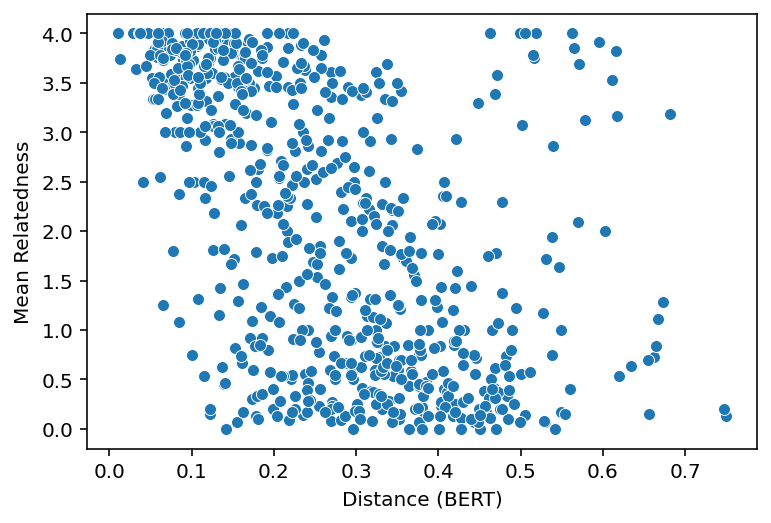

In [34]:
sns.scatterplot(data = df_rawc, x = 'distance_bert', y = 'mean_relatedness')
plt.xlabel("Distance (BERT)")
plt.ylabel("Mean Relatedness")

##### Build a regression model in `statsmodels` predicting `mean_relatedness` from `distance_bert`. 

In [35]:
#### Your code here.

In [36]:
mod = smf.ols(formula='mean_relatedness ~ distance_bert', data=df_rawc).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_relatedness   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     272.3
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.36e-51
Time:                        12:30:51   Log-Likelihood:                -1062.9
No. Observations:                 672   AIC:                             2130.
Df Residuals:                     670   BIC:                             2139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4266      0.096     35.786      0.000       3.239       3.615
distance_bert    -5.1995      0.315    -16.503      0.000      -5.818      -4.581
==============================================================================
Omnibus:                        3.534   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                3.567
Skew:                           0.155   Prob(JB):                        0.168
Kurtosis:                       2.822   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### What is the $R^2$ of this model? Calculate this "from scratch" using `mod.resid`.  

In [37]:
#### Your code here.

In [38]:
ss_resid = sum(mod.resid**2)
ss_total = sum((df_rawc['mean_relatedness'] - df_rawc['mean_relatedness'].mean())**2)
r2 = 1 - ss_resid/ss_total
r2

0.2890022855254103

##### Double-check your work using `mod.rsquared`. 

In [39]:
#### Your code here.

In [40]:
mod.rsquared

0.28900228552540974

##### What are the parameter values? Are they significant?

In [41]:
#### Your code here.

In [42]:
mod.params

Intercept        3.426582
distance_bert   -5.199470
dtype: float64

##### Write out the results as a linear equation. What do these results mean? How would you interpret them?

In [43]:
#### Your code here.

##### Now build a model with `distance_elmo` as a predictor instead of `distance_bert`.  

In [44]:
#### Your code here.

In [45]:
mod = smf.ols(formula='mean_relatedness ~ distance_elmo', data=df_rawc).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_relatedness   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     215.6
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.58e-42
Time:                        12:30:52   Log-Likelihood:                -1083.7
No. Observations:                 672   AIC:                             2171.
Df Residuals:                     670   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.4709      0.108     32.021      0.000       3.258       3.684
distance_elmo   -15.8401      1.079    -14.684      0.000     -17.958     -13.722
==============================================================================
Omnibus:                       63.431   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.206
Skew:                          -0.079   Prob(JB):                     4.10e-05
Kurtosis:                       2.165   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### What are the parameter values? Are they significant?

In [46]:
#### Your code here.

In [47]:
mod.params

Intercept         3.470935
distance_elmo   -15.840123
dtype: float64

##### Write out the results as a linear equation. What do these results mean? How would you interpret them?

In [48]:
#### Your code here.

##### What is the $R^2$ of this model? Calculate this "from scratch" using `mod.resid`.  

In [49]:
#### Your code here.

In [50]:
ss_resid = sum(mod.resid**2)
ss_total = sum((df_rawc['mean_relatedness'] - df_rawc['mean_relatedness'].mean())**2)
r2 = 1 - ss_resid/ss_total
r2

0.24347333537295734

##### Double-check your work using `mod.rsquared`. 

In [51]:
#### Your code here.

In [52]:
mod.rsquared

0.2434733353729569

##### Compare this $R^2$ value to the one from the model using `distance_bert`. Which is higher?

In [53]:
#### Your response here

##### Based on the difference in these $R^2$ values, is one language model better at predicting relatedness than the other? Which one?

In [54]:
#### Your response here

##### Finally, construct a model predicting `mean_relatedness ~ same`.

**Note**: You should be able to find the code for this model from class.

In [55]:
#### Your response here

In [56]:
mod = smf.ols(formula='mean_relatedness ~ same', data=df_rawc).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       mean_relatedness   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     737.9
Date:                Thu, 11 Aug 2022   Prob (F-statistic):          3.92e-110
Time:                        12:30:55   Log-Likelihood:                -927.99
No. Observations:                 672   AIC:                             1860.
Df Residuals:                     670   BIC:                             1869.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3215      0.046     29.011      0.000       1.232       1.411
same[T.True]     2.1432      0.079     27.164      0.000       1.988       2.298
==============================================================================
Omnibus:                       53.283   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.661
Skew:                           0.758   Prob(JB):                     9.10e-15
Kurtosis:                       3.097   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### What is the $R^2$ of this model?

In [57]:
#### Your response here

In [58]:
mod.rsquared

0.524110337262857

##### Compare this $R^2$ to the $R^2$ values from the other two models. Which is highest? What might we conclude about the relative predictive power of these different variables?

In [59]:
#### Your response here

### 2b. Predicting housing prices

In this section, we'll predict the **price** of houses in King County, WA. The original dataset can be found [here](https://www.kaggle.com/datasets/shivachandel/kc-house-data).  

##### Load data

First, let's load a version of the dataset, which can be found in `data/lab/kc_house_data.csv`.

The `price` variable is what we want to predict. There are a ton of other variables, but for now, let's focus on just a few:

- `bedrooms`: #bedrooms
- `bathrooms`: #bathrooms
- `sqft_living`: square footage of the house.  
- `waterfront`: whether the house is on the waterfront.  


In [60]:
df_housing = pd.read_csv("data/lab/kc_house_data.csv")
df_housing.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Create a histogram of the `price` variable. How would you describe this distribution?

In [61]:
#### Your code here

<AxesSubplot:xlabel='price', ylabel='Count'>

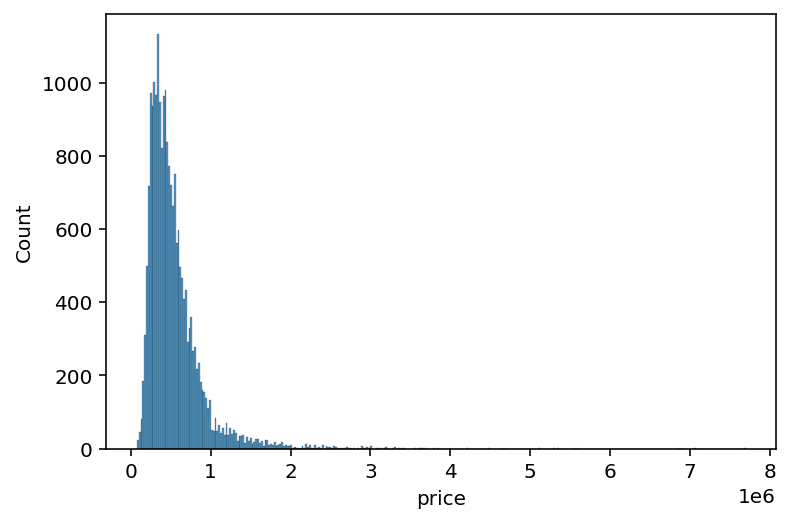

In [62]:
sns.histplot(data = df_housing, x = "price")

##### Create a histogram of the `sqft_living` variable. How would you describe this distribution?

In [63]:
#### Your code here

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

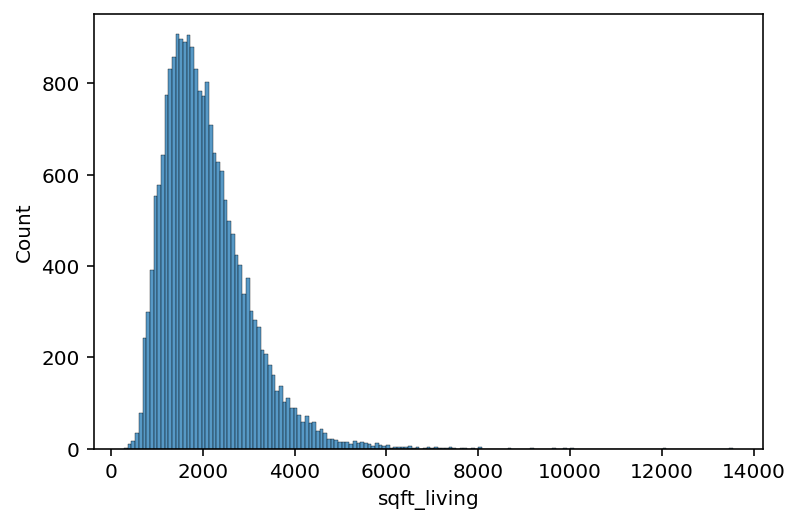

In [64]:
sns.histplot(data = df_housing, x = "sqft_living")

##### Build a linear model predicting `price` from `sqft_living`. 

In [65]:
#### Your code here

In [66]:
mod = smf.ols(formula='price ~ sqft_living', data=df_housing).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:31:01   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### What are the parameters of this model? How would you interpret the coefficients?

In [67]:
#### Your code here

In [68]:
mod.params

Intercept     -43580.743094
sqft_living      280.623568
dtype: float64

##### Let's check for heteroscedasticity. Plot the residuals of our model against `sqft_living`. Does the data show signs of heteroscedasticity?

Recall that a tell-tale sign of heteroscedasticity is "funnel-shaped" residuals.

In [69]:
#### Your code here

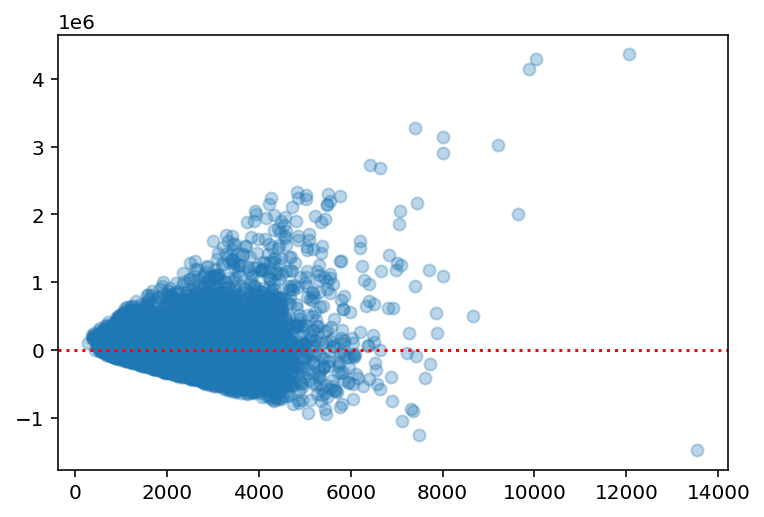

In [70]:
resid = mod.resid
plt.scatter(x = df_housing['sqft_living'],
           y = resid, alpha = .3)
plt.axhline(y = 0, linestyle = "dotted", color = "red")

##### What in our data could be contributing to this heteroscedasticity?

In [71]:
#### Your code here

**Response**: Sometimes, very right-skewed data can lead to heteroscedasdicity. If there is a small number of *very large* numbers in our data (i.e., very right-skewed), those extreme numbers are more likely to diverge in extreme ways from the regression line, simply because they are so much larger.

One way to reduce heteroscedasticity is to log-transform variables that are very heavily right-skewed:

- `price`  
- `sqft_living` 

##### Log transform (using base 10) both `price` and `sqft_living`; create new columns in `df_housing` to correspond to these new variables.

In [72]:
#### Your code here

In [90]:
df_housing['log_price'] = np.log10(df_housing['price'])
df_housing['log_sqft'] = np.log10(df_housing['sqft_living'])

##### Now build a regression model predicting `log_price` from `log_sqft`. How would you interpret the coefficients of this model?

In [91]:
#### Your code here

In [92]:
mod = smf.ols(formula='log_price ~ log_sqft', data=df_housing).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:32:46   Log-Likelihood:                 7785.5
No. Observations:               21613   AIC:                        -1.557e+04
Df Residuals:                   21611   BIC:                        -1.555e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9228      0.020    143.001      0.000       2.883       2.963
log_sqft       0.8368      0.006    134.459      0.000       0.825       0.849
==============================================================================
Omnibus:                      123.344   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.759
Skew:                           0.142   Prob(JB):                     1.98e-25
Kurtosis:                       2.787   Cond. No.                         63.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's check for heteroscedasticity. Plot the residuals of our model against `sqft_living`. Does the data show signs of heteroscedasticity?

Recall that a tell-tale sign of heteroscedasticity is "funnel-shaped" residuals.

In [93]:
#### Your code here

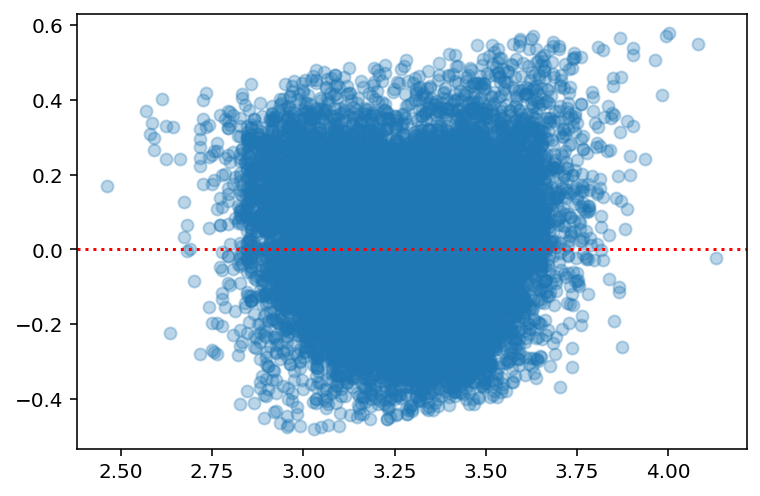

In [94]:
resid = mod.resid
plt.scatter(x = df_housing['log_sqft'],
           y = resid, alpha = .3)
plt.axhline(y = 0, linestyle = "dotted", color = "red")

# Conclusion

Congratulations! You've now gotten some more experience with **building** and **interpreting** linear models in Python.